# Ensemble Building

In [9]:
import sys
sys.path.append('../')
from src.ensemble import EnsembleBuilder
from sklearn.metrics import accuracy_score
import numpy as np 
import pandas as pd
import joblib 
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
X_train = np.load('../data/processed/X_train_processed.npy')
X_val = np.load('../data/processed/X_val_processed.npy')
y_train = np.load('../data/processed/y_train.npy')
y_val = np.load('../data/processed/y_val.npy')

#Load trained models
base_models = {}
model_names = ['decision_tree', 'random_forest', 'xgboost']

for name in model_names:
    base_models[name] = joblib.load(f'../data/models/{name}_best.joblib')


In [10]:
# Create and train ensemble
ensemble_builder = EnsembleBuilder(base_models)
ensemble_builder.fit_ensemble(X_train, y_train)

# Evaluate ensemble
ensemble_results = ensemble_builder.evaluate(X_val, y_val)

print(f'Ensemble Accuracy: , {ensemble_results['accuracy']:.4f}')
print('Classification Report:')
print(pd.DataFrame(ensemble_results['classification_report']).T)

# Save ensemble
ensemble_builder.save_ensemble()

Ensemble Accuracy: , 0.8156
Classification Report:
              precision    recall  f1-score     support
0.0            0.827273  0.866667  0.846512  105.000000
1.0            0.797101  0.743243  0.769231   74.000000
accuracy       0.815642  0.815642  0.815642    0.815642
macro avg      0.812187  0.804955  0.807871  179.000000
weighted avg   0.814800  0.815642  0.814563  179.000000


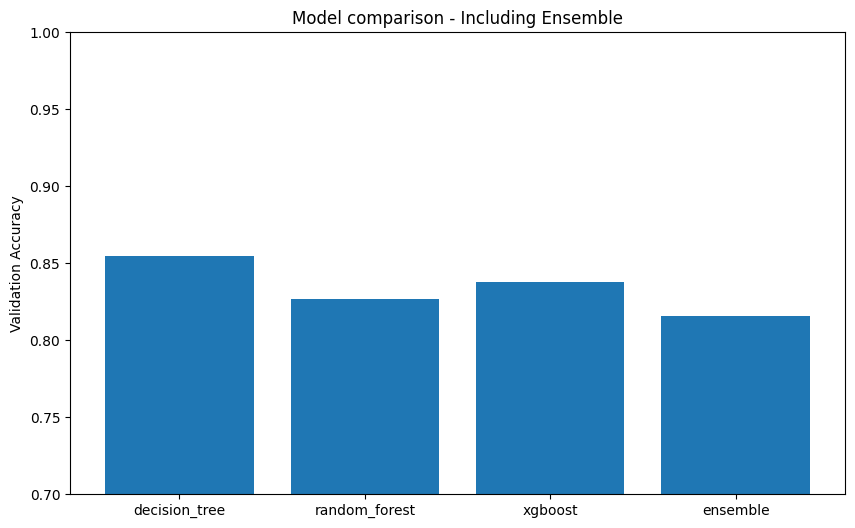

In [12]:
# Compare ensemble with base models
def compare_models(base_models, ensemble_builder, X_val, y_val):
    accuracies = {}

    # Get base model accuracies
    for name, model in base_models.items():
        y_pred = model.predict(X_val)
        accuracies[name] = accuracy_score(y_val, y_pred)

    # Get ensemble accuracy
    accuracies['ensemble'] = ensemble_results['accuracy']

    # Plot comparison
    plt.figure(figsize=(10, 6))
    bars = plt.bar(accuracies.keys(), accuracies.values())

    plt.title('Model comparison - Including Ensemble')
    plt.ylabel('Validation Accuracy')

    plt.ylim(0.7, 1.0)
    plt.show()

compare_models(base_models, ensemble_builder, X_val, y_val)

    